# First steps in Tensorflow

Trying eager execution for a random regression problem

In [1]:
from __future__ import absolute_import, division, print_function

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
tf.enable_eager_execution()
tf.random.set_random_seed(0)

print(tf.__version__)

1.12.0


In [2]:
xmin = 0.01
xmax = 1
xres = 100
x = tf.linspace(xmin, xmax, xres)

In [3]:
y = tf.math.polyval([0., 2., 5.], x) + tf.math.sin(8*x) + .3 * tf.random.normal([xres])

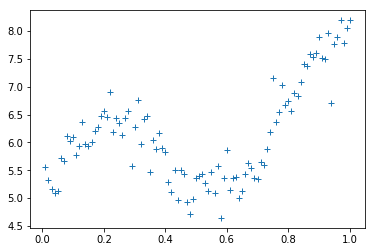

In [4]:
plt.plot(x, y, "+")

## Keras training - functional API

In [5]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(1,)),
        keras.layers.Dense(32, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [6]:
EPOCHS = 500

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

history = model.fit(x.numpy(), y, epochs=EPOCHS,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

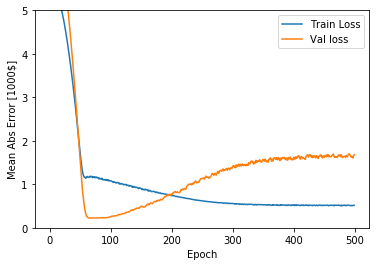

In [7]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

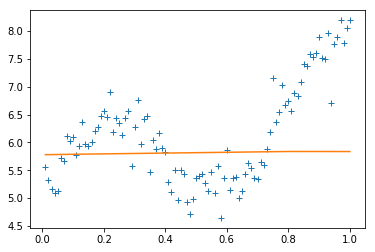

In [8]:
plt.plot(x, y, "+", x, model.predict(x))